<a href="https://colab.research.google.com/github/HannahBabe/audio_spoof_detection/blob/main/FinalProjectSubmission(Short)_ReturnedVersion_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Download Data Set

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install tensorflow-io

In [7]:
import tensorflow as tf
import tensorflow_io as tfio
import matplotlib.pyplot as plt
import keras
import os

#Pre-Process Training Data

Goal: Convert audio files into spectograms, define training (audio file) and validation (class ID) sets

In [4]:
%cd /content/drive/MyDrive/Github/SASVC2022_Baseline/LA/

/content/drive/MyDrive/Github/SASVC2022_Baseline/LA


In [5]:
# ----------------------------
# Prepare training data from Metadata file
# ----------------------------
import pandas as pd
import numpy as np
from pathlib import Path

download_path = Path.cwd()

# Read metadata file and convert to csv
read_file_train = pd.read_csv(download_path/'ASVspoof2019_LA_cm_protocols'/'ASVspoof2019.LA.cm.train.trn.txt', delim_whitespace=True, header=None)
read_file_train.to_csv (download_path/'ASVspoof2019_LA_cm_protocols'/'ASVspoof2019.LA.cm.train.trn.csv', index=None)
metadata_file_train = download_path/'ASVspoof2019_LA_cm_protocols'/'ASVspoof2019.LA.cm.train.trn.csv'
df_train = pd.read_csv(metadata_file_train)

# Construct file path by concatenating file name and .flac
df_train['relative_path'] = df_train['1'].astype(str) + '.flac'

# Take relevant columns
df_train = df_train[['relative_path', '4']]
df_train.rename(columns={"4": "key"}, inplace=True)

df_train.index.name = 'idx'

df_train['key_binary'] = np.where(df_train['key']=='bonafide', 1, 0)
df_train.head()


,relative_path,key,key_binary
idx,,,
0,LA_T_1138215.flac,bonafide,1
1,LA_T_1271820.flac,bonafide,1
2,LA_T_1272637.flac,bonafide,1
3,LA_T_1276960.flac,bonafide,1
4,LA_T_1341447.flac,bonafide,1


In [6]:
# ----------------------------
# Prepare validation/dev data from Metadata file --- not completed. Need to split the column. 
# ----------------------------

import pandas as pd
from pathlib import Path

download_path = Path.cwd()

# Read metadata file and convert to csv --- Ask about this in class
read_file_dev = pd.read_csv(download_path/'ASVspoof2019_LA_cm_protocols'/'ASVspoof2019.LA.cm.dev.trl.txt',sep=',', skiprows=5, header=None)
read_file_dev.to_csv (download_path/'ASVspoof2019_LA_cm_protocols'/'ASVspoof2019.LA.cm.dev.trl.csv', index=None)
metadata_file_dev = download_path/'ASVspoof2019_LA_cm_protocols'/'ASVspoof2019.LA.cm.dev.trl.csv'
df_dev = pd.read_csv(metadata_file_dev)
df_dev['0'] = df_dev['0'].astype(str)
df_dev[[1,'file_name',3,4,'key']]=df_dev['0'].str.split(",", expand=True)

# Construct file path by concatenating file name and .flac
df_dev['relative_path'] = 'ASVspoof2019_LA_dev/flac/' + df_dev['file_name'].astype(str) + '.flac'

df_dev = df_dev[['relative_path','key']]

df_dev.index.name = 'idx'

df_dev['key_binary'] = np.where(df_dev['key']=='bonafide', 1, 0)
df_dev.head()

,relative_path,key,key_binary
idx,,,
0,ASVspoof2019_LA_dev/flac/LA_D_1047731.flac,bonafide,1
1,ASVspoof2019_LA_dev/flac/LA_D_1105538.flac,bonafide,1
2,ASVspoof2019_LA_dev/flac/LA_D_1125976.flac,bonafide,1
3,ASVspoof2019_LA_dev/flac/LA_D_1293230.flac,bonafide,1
4,ASVspoof2019_LA_dev/flac/LA_D_1340209.flac,bonafide,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


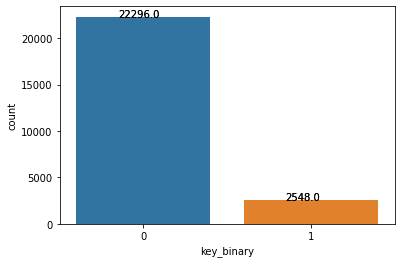

In [ ]:
import seaborn as sns
sns.countplot(df_dev['key_binary'])
ax = sns.countplot(df_dev['key_binary'])

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

In [7]:
# ----------------------------
# Prepare evaluation/eval data from Metadata file
# ----------------------------
import pandas as pd
import numpy as np
from pathlib import Path

download_path = Path.cwd()

# Read metadata file and convert to csv
read_file_eval = pd.read_csv(download_path/'ASVspoof2019_LA_cm_protocols'/'ASVspoof2019.LA.cm.eval.trl.txt', delim_whitespace=True, header=None)
read_file_eval.to_csv (download_path/'ASVspoof2019_LA_cm_protocols'/'ASVspoof2019.LA.cm.eval.trn.csv', index=None)
metadata_file_eval = download_path/'ASVspoof2019_LA_cm_protocols'/'ASVspoof2019.LA.cm.eval.trn.csv'
df_eval = pd.read_csv(metadata_file_eval)

# Construct file path by concatenating file name and .flac
df_eval['relative_path'] = df_eval['1'].astype(str) + '.flac'

# Take relevant columns
df_eval = df_eval[['relative_path', '4']]
df_eval.rename(columns={"4": "key"}, inplace=True)

df_eval.index.name = 'idx'

df_eval['key_binary'] = np.where(df_eval['key']=='bonafide', 1, 0)
df_eval.head()

,relative_path,key,key_binary
idx,,,
0,LA_E_2834763.flac,spoof,0
1,LA_E_8877452.flac,spoof,0
2,LA_E_6828287.flac,spoof,0
3,LA_E_6977360.flac,spoof,0
4,LA_E_5932896.flac,spoof,0


In [46]:
import math, random
import torch
import torchaudio
from torchaudio import transforms
from IPython.display import Audio
import tensorflow_io as tfio

class AudioUtil():
  # ----------------------------
  # Load an audio file. Return the signal as a tensor and the sample rate
  # ----------------------------
  @staticmethod
  def open(audio_file):
    audio = tfio.audio.AudioIOTensor(audio_file)
    audio_slice = audio[100:]
    audio_squeezed = tf.squeeze(audio_slice, axis=[-1])
    return audio_squeezed

  # ----------------------------
  # Pad (or truncate) the signal to a fixed length 'max_ms' defined to be 3000 in milliseconds
  # ----------------------------
  def pad_trunc(aud, max_ms):
      sig_len = aud.shape[0]
      max_len = 16 * max_ms #sample rate of 16000/1000

      if (sig_len > max_len):
        # Truncate the signal to the given length
        aud = aud[0:max_len]

      elif (sig_len < max_len):
        # Length of padding to add at the beginning and end of the signal
        pad_begin_len = random.randint(0, max_len - sig_len)
        pad_end_len = max_len - sig_len - pad_begin_len

        # Pad with 0s
        pad_begin = tf.constant([0]*pad_begin_len, dtype='int16')
        pad_end = tf.constant([0]*pad_end_len, dtype='int16')

        aud = tf.concat([pad_begin, aud, pad_end], 0)
  
      return aud

  # ----------------------------
  # Generate a Spectrogram
  # ----------------------------
  @staticmethod
  def spectro_gram(aud):
    tensor = tf.cast(aud, tf.float32) / 32768.0
    # Convert to spectrogram
    spectrogram = tfio.audio.spectrogram(tensor, nfft=512, window=512, stride=256)
    mel_spectrogram = tfio.audio.melscale(spectrogram, rate=16000, mels=128, fmin=0, fmax=8000)
    dbscale_mel_spectrogram = tfio.audio.dbscale(mel_spectrogram, top_db=80)
    return (tf.reshape((dbscale_mel_spectrogram),[1, 188, 128,1]))

In [8]:
import numpy as np
import keras
import tensorflow as tf
from tensorflow.keras.utils import Sequence

class DataGenerator(Sequence):
    #'Generates data for Keras'
    def __init__(self, df, batch_size=32, dim=(188, 128), n_channels=1,
                 n_classes=2, shuffle=False, duration=3000, data_path='/content/drive/MyDrive/Github/SASVC2022_Baseline/LA/'):
        #'Initialization'
        self.df = df
        self.dim = dim
        self.batch_size = batch_size
        self.list_indexes = df.index
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.duration = duration
        self.data_path = data_path
        self.on_epoch_end()

    def __len__(self):
        #'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_indexes) / self.batch_size))

    def getkey(self,idx):
      # Get the key (spoof or bonafide)
      key = self.df.loc[self.df.index[idx], 'key_binary']
      return key

    def __getitem__(self, index):
        #'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
       # list_IDs_temp = [self.list_IDs[k] for k in indexes]

        # Generate data
        X, y = self.__data_generation(indexes)

        return X, y

    def on_epoch_end(self):
        #'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_indexes))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, indexes):
        #'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization
        X = np.empty((self.batch_size, *self.dim, self.n_channels))
        y = np.empty((self.batch_size), dtype=int)

        # Generate data
        for i, idx in enumerate(indexes):
            # Store sample
            X[i,] = x_train_spectrogram[idx]

            # Store class
            y[i] = self.getkey(idx)

        return X, tf.keras.utils.to_categorical(y, num_classes=self.n_classes)

In [9]:
import numpy as np
import keras
import tensorflow as tf
from tensorflow.keras.utils import Sequence

class DataGeneratorDev(Sequence):
    #'Generates data for Keras'
    def __init__(self, df, batch_size=256, dim=(188, 128), n_channels=1,
                 n_classes=2, shuffle=False, duration=3000, data_path='/content/drive/MyDrive/Github/SASVC2022_Baseline/LA/'):
        #'Initialization'
        self.df = df
        #self.spectrograms = spectrograms
        self.dim = dim
        self.batch_size = batch_size
        self.list_indexes = df.index
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.duration = duration
        self.data_path = data_path
        self.on_epoch_end()
        

    def __len__(self):
        #'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_indexes) / self.batch_size))

    def getkey(self,idx):
      # Get the key (spoof or bonafide)
      key = self.df.loc[self.df.index[idx], 'key_binary']
      return key

    def __getitem__(self, index):
        #'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
       # list_IDs_temp = [self.list_IDs[k] for k in indexes]

        # Generate data
        X, y = self.__data_generation(indexes)

        return X, y

    def on_epoch_end(self):
        #'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_indexes))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, indexes):
        #'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization
        X = np.empty((self.batch_size, *self.dim, self.n_channels))
        y = np.empty((self.batch_size), dtype=int)

        # Generate data
        for i, idx in enumerate(indexes):
            # Store sample
            X[i,] = x_dev_spectrogram[idx]

            # Store class
            y[i] = self.getkey(idx)

        return X, tf.keras.utils.to_categorical(y, num_classes=self.n_classes)

In [10]:
import numpy as np
import keras
import tensorflow as tf
from tensorflow.keras.utils import Sequence

class DataGeneratorEval(Sequence):
    #'Generates data for Keras'
    def __init__(self, df, batch_size=256, dim=(188, 128), n_channels=1,
                 n_classes=2, shuffle=False, duration=3000, data_path='/content/drive/MyDrive/Github/SASVC2022_Baseline/LA/'):
        #'Initialization'
        self.df = df
        #self.spectrograms = spectrograms
        self.dim = dim
        self.batch_size = batch_size
        self.list_indexes = df.index
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.duration = duration
        self.data_path = data_path
        self.on_epoch_end()
        

    def __len__(self):
        #'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_indexes) / self.batch_size))

    def getkey(self,idx):
      # Get the key (spoof or bonafide)
      key = self.df.loc[self.df.index[idx], 'key_binary']
      return key

    def __getitem__(self, index):
        #'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
       # list_IDs_temp = [self.list_IDs[k] for k in indexes]

        # Generate data
        X, y = self.__data_generation(indexes)

        return X, y

    def on_epoch_end(self):
        #'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_indexes))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, indexes):
        #'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization
        X = np.empty((self.batch_size, *self.dim, self.n_channels))
        y = np.empty((self.batch_size), dtype=int)

        # Generate data
        for i, idx in enumerate(indexes):
            # Store sample
            X[i,] = x_eval_spectrogram[idx]

            # Store class
            y[i] = self.getkey(idx)

        return X, tf.keras.utils.to_categorical(y, num_classes=self.n_classes)

Create h5py file -- Don't need to run this again. 

In [11]:
#Get dev
import numpy as np
import h5py

%cd /content/drive/MyDrive/Github/SASVC2022_Baseline/LA/ASVspoof2019_LA_dev/
hf_dev = h5py.File('dev_spectrograms2.h5', 'r')
x_dev_spectrogram = hf_dev.get('dataset_dev')
x_dev_spectrogram = np.array(x_dev_spectrogram)
hf_dev.close()

/content/drive/MyDrive/Github/SASVC2022_Baseline/LA/ASVspoof2019_LA_dev


In [12]:
#Get train
import numpy as np
import h5py


%cd /content/drive/MyDrive/Github/SASVC2022_Baseline/LA/ASVspoof2019_LA_train/
hf_train = h5py.File('spectrograms.h5', 'r')
x_train_spectrogram = hf_train.get('dataset_train')
x_train_spectrogram = np.array(x_train_spectrogram)
hf_train.close()

/content/drive/MyDrive/Github/SASVC2022_Baseline/LA/ASVspoof2019_LA_train


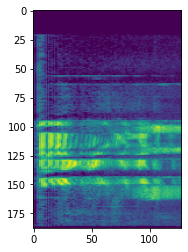

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train_spectrogram[492].reshape(188,128))

In [13]:
#get eval_spec
import h5py
import numpy as np
%cd /content/drive/MyDrive/Github/SASVC2022_Baseline/LA/ASVspoof2019_LA_eval/
hf_eval = h5py.File('eval_spectrograms4.h5','r')
x_eval_spectrogram = hf_eval.get('dataset_eval')
x_eval_spectrogram = np.array(x_eval_spectrogram)
hf_eval.close()

/content/drive/MyDrive/Github/SASVC2022_Baseline/LA/ASVspoof2019_LA_eval


In [30]:
x_eval_spectrogram[0]

array([[[-44.433464],
        [-44.433464],
        [-44.433464],
        ...,
        [-44.433464],
        [-44.433464],
        [-44.433464]],

       [[-44.433464],
        [-44.433464],
        [-44.433464],
        ...,
        [-44.433464],
        [-44.433464],
        [-44.433464]],

       [[-44.433464],
        [-44.433464],
        [-44.433464],
        ...,
        [-44.433464],
        [-44.433464],
        [-44.433464]],

       ...,

       [[-44.433464],
        [-44.433464],
        [-44.433464],
        ...,
        [-44.433464],
        [-44.433464],
        [-44.433464]],

       [[-44.433464],
        [-44.433464],
        [-44.433464],
        ...,
        [-44.433464],
        [-44.433464],
        [-44.433464]],

       [[-44.433464],
        [-44.433464],
        [-44.433464],
        ...,
        [-44.433464],
        [-44.433464],
        [-44.433464]]], dtype=float32)

In [14]:
#get eval_keys
import h5py
import numpy as np
%cd /content/drive/MyDrive/Github/SASVC2022_Baseline/LA/ASVspoof2019_LA_eval/
hf = h5py.File('eval_spectrograms_keys.h5','r')
y_eval = hf.get('dataset_eval_keys')
y_eval = np.array(y_eval)
hf.close()

/content/drive/MyDrive/Github/SASVC2022_Baseline/LA/ASVspoof2019_LA_eval


In [16]:
y_eval[0]

array([0])

In [30]:
from tensorflow.keras.utils import to_categorical
one_hot_encode = to_categorical(y_eval)

In [31]:
one_hot_encode[0]

array([1., 0.], dtype=float32)

In [37]:
one_hot_encode.shape

(8178, 2)

In [39]:
x_eval_spectrogram.shape

(8178, 188, 128, 1)

In [16]:
import numpy as np
df_y_eval = pd.DataFrame(y_eval)
df_y_eval.rename(columns={0: 'key_binary'}, inplace=True)
df_y_eval.index.name = 'idx'
df_y_eval.head()

,key_binary
idx,
0,0
1,0
2,0
3,1
4,0


In [17]:
data_path = '/content/drive/MyDrive/Github/SASVC2022_Baseline/LA/'
#%cd /content/drive/MyDrive/SASVC2022_Baseline/LA/ASVspoof2019_LA_train/flac/

# item shape = (num_channels, Mel freq_bands, time_steps) 
#batch shape = (batch_sz, num_channels, Mel freq_bands, time_steps)

params = {'dim': (188, 128),
          'batch_size': 64,
          'n_classes': 2,
          'n_channels': 1,
          'duration': 3000,
          'shuffle': True,
          'data_path' : data_path}

# Generators
training_generator = DataGenerator(df_train, **params)
validation_generator = DataGeneratorDev(df_dev, **params)
evaluation_generator = DataGeneratorEval(df_y_eval, **params)

In [ ]:
len(training_generator)

396

In [ ]:
len(evaluation_generator)

127

In [ ]:
training_generator[394][1]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.

# Build Model 

Input: A batch of images (batch_sz, num_channels, Mel freq_bands, time_steps)

Output: Class prediction


Model inspired by NeMO https://docs.nvidia.com/deeplearning/nemo/user-guide/docs/en/stable/asr/speech_classification/models.html#id2

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import layers

# filters, shape

model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(188, 128,1)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dropout(0.3))

###final layer
model.add(layers.Dense(2, activation='softmax')) 

model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 186, 126, 32)      320       
                                                                 
 batch_normalization_1 (Batc  (None, 186, 126, 32)     128       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 186, 126, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 93, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 91, 61, 64)        18496     
                                                                 
 batch_normalization_2 (Batc  (None, 91, 61, 64)      

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import layers

# filters, shape

model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(188, 128,1)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation="relu"))

###final layer
model.add(layers.Dense(2, activation='softmax')) 

model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 186, 126, 32)      320       
                                                                 
 batch_normalization_3 (Batc  (None, 186, 126, 32)     128       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 186, 126, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 93, 63, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 187488)            0         
                                                                 
 dense_4 (Dense)             (None, 256)              

#Train Model

In [54]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(patience=4, restore_best_weights=True, monitor='accuracy')

In [55]:
class_weight = {0: 10.,
                1: 1.}

In [56]:
model.fit(training_generator,
          validation_data = validation_generator,
          batch_size=128,
          use_multiprocessing=True,
          epochs=10,
          callbacks=[es],
          class_weight=class_weight)

Epoch 1/10
396/396 [==============================] - 53s 132ms/step - loss: 4.1483 - accuracy: 0.9036 - val_loss: 98.9154 - val_accuracy: 0.8485
Epoch 2/10
396/396 [==============================] - 47s 117ms/step - loss: 0.2868 - accuracy: 0.9386 - val_loss: 278.0416 - val_accuracy: 0.8937
Epoch 3/10
396/396 [==============================] - 47s 117ms/step - loss: 0.1938 - accuracy: 0.9593 - val_loss: 716.0506 - val_accuracy: 0.8974
Epoch 4/10
396/396 [==============================] - 46s 117ms/step - loss: 0.1478 - accuracy: 0.9699 - val_loss: 323.2034 - val_accuracy: 0.8974
Epoch 5/10
396/396 [==============================] - 46s 117ms/step - loss: 0.0951 - accuracy: 0.9805 - val_loss: 173.1860 - val_accuracy: 0.8976
Epoch 6/10
396/396 [==============================] - 46s 117ms/step - loss: 0.0865 - accuracy: 0.9824 - val_loss: 184.1237 - val_accuracy: 0.8869


KeyboardInterrupt: ignored

In [57]:
%cd /content/drive/MyDrive/Github/SASVC2022_Baseline/LA/
model.save('model3')

/content/drive/MyDrive/Github/SASVC2022_Baseline/LA
INFO:tensorflow:Assets written to: model3/assets


In [10]:
import numpy as np
import keras
import tensorflow as tf

In [8]:
%cd /content/drive/MyDrive/Github/SASVC2022_Baseline/LA/
reconstructed_model = keras.models.load_model("model2")

/content/drive/MyDrive/Github/SASVC2022_Baseline/LA


#Evaluate Model (todo)

In [65]:
print(reconstructed_model.evaluate(x_eval_spectrogram,one_hot_encode))

256/256 [==============================] - 3s 11ms/step - loss: 4.8797 - accuracy: 0.8226
[4.87971830368042, 0.8225727677345276]


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

preds = reconstructed_model.predict(x_eval_spectrogram)

In [62]:
y_pred = np.argmax(preds, axis=1)

In [ ]:
conf=confusion_matrix(y_eval, y_pred)
print(conf)

[[4333  138]
 [3671   36]]


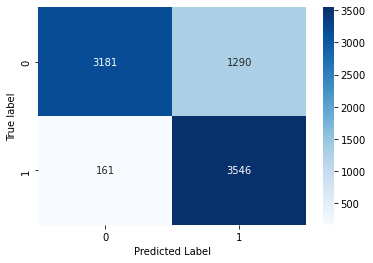

In [61]:
import seaborn as sns
ax = sns.heatmap(conf, annot=True, fmt='d', cmap='Blues') 
ax.set(xlabel='Predicted Label',
       ylabel='True label');

In [9]:
%cd /content/drive/MyDrive/Audio Test Files/

/content/drive/MyDrive/Audio Test Files


In [36]:
audio = AudioUtil.open("spoof_test_1.flac")
dur_aud = AudioUtil.pad_trunc(audio, 3000)
sgram = AudioUtil.spectro_gram(dur_aud)

In [16]:
reconstructed_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 186, 126, 32)      320       
                                                                 
 batch_normalization_6 (Batc  (None, 186, 126, 32)     128       
 hNormalization)                                                 
                                                                 
 dropout_7 (Dropout)         (None, 186, 126, 32)      0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 93, 63, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 187488)            0         
                                                                 
 dense_3 (Dense)             (None, 256)              

In [37]:
sgram.shape

TensorShape([1, 188, 128, 1])

In [38]:
test_pred = reconstructed_model.predict(sgram)

In [39]:
print(test_pred)

[[1. 0.]]


In [40]:
from IPython.display import Audio

import tensorflow as tf
import tensorflow_io as tfio

audio = tfio.audio.AudioIOTensor('spoof_test_1.flac')

audio_slice = audio[100:]

# remove last dimension
audio_tensor = tf.squeeze(audio_slice, axis=[-1])
Audio(audio_tensor.numpy(), rate=audio.rate.numpy())

In [47]:
audio = AudioUtil.open("test_real_1.flac")
dur_aud = AudioUtil.pad_trunc(audio, 3000)
sgram = AudioUtil.spectro_gram(dur_aud)

In [48]:
sgram

<tf.Tensor: shape=(1, 188, 128, 1), dtype=float32, numpy=
array([[[[34.305756],
         [39.856323],
         [34.305756],
         ...,
         [34.305756],
         [34.305756],
         [34.305756]],

        [[34.305756],
         [48.726418],
         [38.51057 ],
         ...,
         [34.305756],
         [34.305756],
         [34.305756]],

        [[34.305756],
         [41.43156 ],
         [34.305756],
         ...,
         [34.305756],
         [34.305756],
         [34.305756]],

        ...,

        [[34.305756],
         [92.50548 ],
         [82.28963 ],
         ...,
         [34.305756],
         [34.305756],
         [34.305756]],

        [[34.305756],
         [91.45418 ],
         [81.238335],
         ...,
         [54.439816],
         [54.572784],
         [54.69637 ]],

        [[34.305756],
         [59.462708],
         [49.246864],
         ...,
         [54.332005],
         [54.46129 ],
         [54.588097]]]], dtype=float32)>

In [42]:
test_pred = reconstructed_model.predict(sgram)

In [43]:
print(test_pred)

[[1. 0.]]


In [49]:
from IPython.display import Audio

import tensorflow as tf
import tensorflow_io as tfio

audio = tfio.audio.AudioIOTensor('test_real_1.flac')

audio_slice = audio[100:]

# remove last dimension
audio_tensor = tf.squeeze(audio_slice, axis=[-1])
Audio(audio_tensor.numpy(), rate=audio.rate.numpy())